<a href="https://colab.research.google.com/github/derek-shing/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/Linear_Regression_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import everything you could ever need. ;)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Ukraine Used Car Sale Price Prediction
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv')
print(df.shape)
df.head()

(8495, 9)


,make,price,body,mileage,engV,engType,registration,year,drive
0,23,15500.0,0,68,2.5,1,1,2010,1
1,50,20500.0,3,173,1.8,1,1,2011,2
2,50,35000.0,2,135,5.5,3,1,2008,2
3,50,17800.0,5,162,1.8,0,1,2012,0
4,55,16600.0,0,83,2.0,3,1,2013,1


# Predictive Modeling with Linear Regression

## 1.1 Divide the dataset features into an X matrix and y vector ("price" is what we want to predict).

In [4]:
df.columns

Index(['make', 'price', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'drive'],
      dtype='object')

In [0]:
X = df[['make', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'drive']]
y = df['price'].values

In [8]:
y

array([15500., 20500., 35000., ..., 18500., 16999., 22500.])

## 1.2 Split the data into test and train datasets using train_test_split

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [13]:
print(X_train.shape)
print(Y_train.shape)

(5946, 8)
(5946,)


## 1.3 Use Scikit-Learn to fit a multiple regression model using your training data.

In [14]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## 1.4 Report the Intercept and Coefficient Values for the fitted model

In [15]:
print("Slope Coefficient: ", model.coef_)
print("\nIntercept Value: ", model.intercept_)

Slope Coefficient:  [  -33.58366865 -1651.42873719   -39.22295229   258.51438812
 -1032.35062237  4552.14384808  1137.43759076  8492.7810931 ]

Intercept Value:  -2263470.834079915


## 1.5 Use the test data to make predictions

In [0]:
y_pred = model.predict(X_test)

## 1.6 Calculate and report both the Root-Mean-Square error and $R^2$ for the model. 

In [17]:
  RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
  R2 = r2_score(Y_test, y_pred)

  print('RMSE is {}'.format(RMSE))
  print('R^2 is {}'.format(R2))

RMSE is 20339.401645712143
R^2 is 0.3095511513158752


## 1.7 How should we interpret the coefficient corresponding to the "year" feature?

The codefficient of the 'year' feature is 1137.43759076. That mean every unit of increase in 'year' will cause the price increase 1137.43759076 in our prediction

## 1.8 How should we interpret the Root-Mean-Square Error?

For every testing data point, we have the error equal to the difference between the price and the prediction of price. Root-Mean-Square Error is the square root of the mean of error square. It mean how much is our prediction different from the real data in average.

## 1.9 How should we interpret the $R^2$?

R^2 mean the percentage of the target which can explained by our feature in the model

# Log-Linear and Polynomial Regression

## 2.1 Engineer a new variable by taking the log of the price varible.

In [0]:
  df['ln_price'] = np.log(df['price'])

In [21]:
df.head()

,make,price,body,mileage,engV,engType,registration,year,drive,ln_price
0,23,15500.0,0,68,2.5,1,1,2010,1,9.648595
1,50,20500.0,3,173,1.8,1,1,2011,2,9.928180
2,50,35000.0,2,135,5.5,3,1,2008,2,10.463103
3,50,17800.0,5,162,1.8,0,1,2012,0,9.786954
4,55,16600.0,0,83,2.0,3,1,2013,1,9.717158


## 2.2 Use scatterplots or seaborn's pairplot function to do the "eyeball test" for non-linearly distributed features.

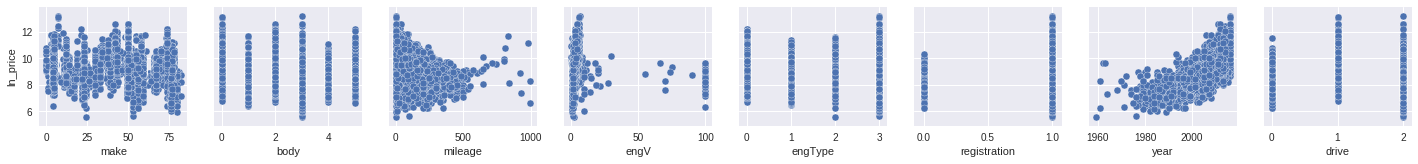

In [23]:
x_columns = df.columns.drop(['price','ln_price'])

# Only plot the scatterplot of x variables with our y variable
sns.pairplot(data=df, y_vars=['ln_price'], x_vars=x_columns)

## 2.3 If appropriate, create any polynomial features. 

In [0]:
df['year_square']=df['year']**2
df['mileage_square']=df['mileage']**2

In [25]:
df.head()

,make,price,body,mileage,engV,engType,registration,year,drive,ln_price,year_square,mileage_square
0,23,15500.0,0,68,2.5,1,1,2010,1,9.648595,4040100,4624
1,50,20500.0,3,173,1.8,1,1,2011,2,9.928180,4044121,29929
2,50,35000.0,2,135,5.5,3,1,2008,2,10.463103,4032064,18225
3,50,17800.0,5,162,1.8,0,1,2012,0,9.786954,4048144,26244
4,55,16600.0,0,83,2.0,3,1,2013,1,9.717158,4052169,6889


## 2.4 Use the new log-transformed y variable and your x variables (including any new polynomial features) to fit a new linear regression model. Then report the: intercept, coefficients, RMSE, and $R^2$.

In [26]:
df.columns

Index(['make', 'price', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'drive', 'ln_price', 'year_square', 'mileage_square'],
      dtype='object')

In [27]:
X = df[['make', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'drive', 'year_square', 'mileage_square']]
y = df['ln_price'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.3, random_state=42)

model = LinearRegression()
model.fit(X_train, Y_train)

print("Slope Coefficient: ", model.coef_)
print("\nIntercept Value: ", model.intercept_)

y_pred = model.predict(X_test)

RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
R2 = r2_score(Y_test, y_pred)

print('RMSE is {}'.format(RMSE))
print('R^2 is {}'.format(R2))

Slope Coefficient:  [-1.43568428e-03 -9.02818631e-02  8.77831043e-04  8.01865497e-03
 -4.86306092e-02  6.80499323e-01 -6.18009913e+00  3.78701111e-01
  1.56905158e-03 -3.64054124e-07]

Intercept Value:  6091.7675418736435
RMSE is 0.557111618360564
R^2 is 0.6699507780172993


## 2.5 How might we interpret the coefficient on "year" in this new regression model?

Each unit of increase in year will cause the nature log of the price to decrease -6.18009913e+00

# Gradient Descent

## 3.1 What does Gradient Descent seek to minimize?

Gradient Descent seek to minimize the cost function we defined. In linear regression, the cost function is the sum of square error.

## 3.2 What is the "Learning Rate" and what is its function?

Learning Rate is how much we want to move our variables X toward the minimin point. It is equal a constant we defined, let's say alpha, time the slope (Derivatives) at the current point

# Model Diagnostics

## 4.1 Use statsmodels to run a log-linear or log-polynomial linear regression with robust standard errors.

In [29]:
X = sm.add_constant(X)

model = sm.OLS(y, X).fit(cov_type='HC3')
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     1693.
Date:                Fri, 22 Feb 2019   Prob (F-statistic):               0.00
Time:                        16:59:25   Log-Likelihood:                -6963.9
No. Observations:                8495   AIC:                         1.395e+04
Df Residuals:                    8484   BIC:                         1.403e+04
Df Model:                          10                                         
Covariance Type:                  HC3                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           6524.4284    685.467      9.

## 4.2 Calculate the Variance Inflation Factor (VIF) of our X variables. Do we have multicollinearity problems?

In [34]:
print(X.columns, '\n\n')
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

Index(['make', 'body', 'mileage', 'engV', 'engType', 'registration', 'year',
       'drive', 'year_square', 'mileage_square'],
      dtype='object') 


[4.873449920766528, 3.5581180857902974, 16.901034697705164, 1.2389176341270427, 2.8861516873960555, 18.76702267445683, 128455.84401971211, 1.8195391559998637, 127380.79214568115, 6.236267524087703]


In [0]:
X = X.drop('const', axis=1)
X.corr()

In [36]:
X.corr()

,make,body,mileage,engV,engType,registration,year,drive,year_square,mileage_square
make,1.000000,0.026127,-0.035097,-0.021246,-0.011880,0.104557,-0.013833,-0.196444,-0.013679,-0.031106
body,0.026127,1.000000,0.287060,-0.025320,-0.184007,-0.082643,-0.154554,-0.162235,-0.154919,0.195170
mileage,-0.035097,0.287060,1.000000,0.042081,-0.229644,-0.229354,-0.503135,0.067962,-0.504345,0.872954
engV,-0.021246,-0.025320,0.042081,1.000000,-0.004896,-0.015274,-0.041076,0.084756,-0.041024,0.033698
engType,-0.011880,-0.184007,-0.229644,-0.004896,1.000000,0.152988,-0.040471,-0.044859,-0.040323,-0.169311
registration,0.104557,-0.082643,-0.229354,-0.015274,0.152988,1.000000,0.185104,-0.055793,0.185613,-0.163092
year,-0.013833,-0.154554,-0.503135,-0.041076,-0.040471,0.185104,1.000000,-0.169709,0.999995,-0.389608
drive,-0.196444,-0.162235,0.067962,0.084756,-0.044859,-0.055793,-0.169709,1.000000,-0.169444,0.083042
year_square,-0.013679,-0.154919,-0.504345,-0.041024,-0.040323,0.185613,0.999995,-0.169444,1.000000,-0.390230
mileage_square,-0.031106,0.195170,0.872954,0.033698,-0.169311,-0.163092,-0.389608,0.083042,-0.390230,1.000000


We have multicollinearity problems on ''mileage', 'registration', 'year' and 'year_square' .Those value is greater than 10